Energy with dietary fibre, equated \n(kJ)        9.92
Calcium (Ca) \n(mg)                              9.92
Energy, without dietary fibre, equated \n(kJ)    9.92
Potassium (K) \n(mg)                             9.92
Moisture (water) \n(g)                           9.92
Nitrogen \n(g)                                   9.84
Magnesium (Mg) \n(mg)                            9.84
Sodium (Na) \n(mg)                               9.84
Phosphorus (P) \n(mg)                            9.84
Zinc (Zn) \n(mg)                                 9.84
Protein \n(g)                                    9.84
Ash \n(g)                                        9.84
Iron (Fe) \n(mg)                                 9.60
Niacin derived from tryptophan \n(mg)            9.60
Niacin derived equivalents \n(mg)                9.60
Tryptophan \n(mg)                                9.60
Fat, total \n(g)                                 9.20
Thiamin (B1) \n(mg)                              9.20
Riboflavin (B2) \n(mg)      

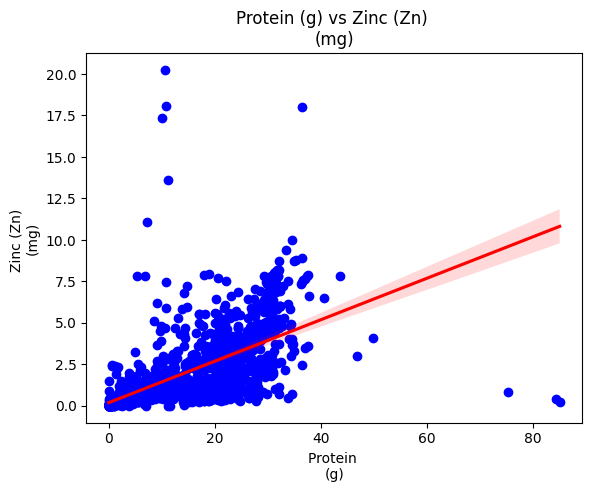

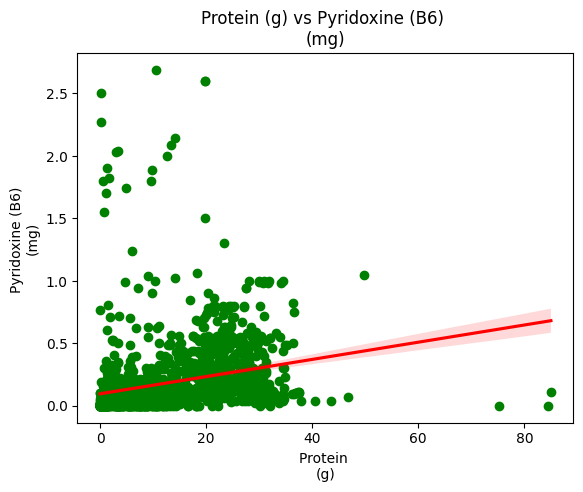

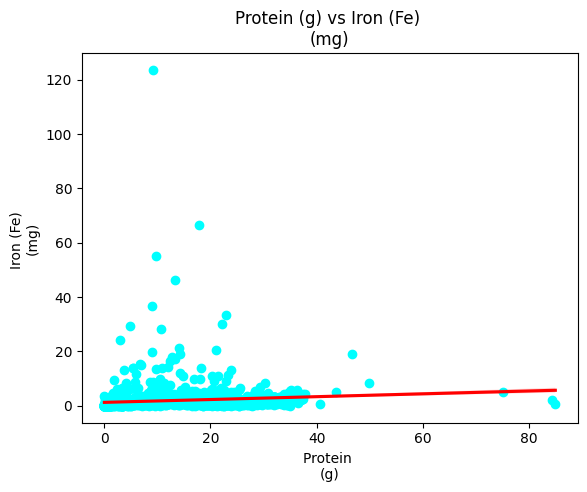

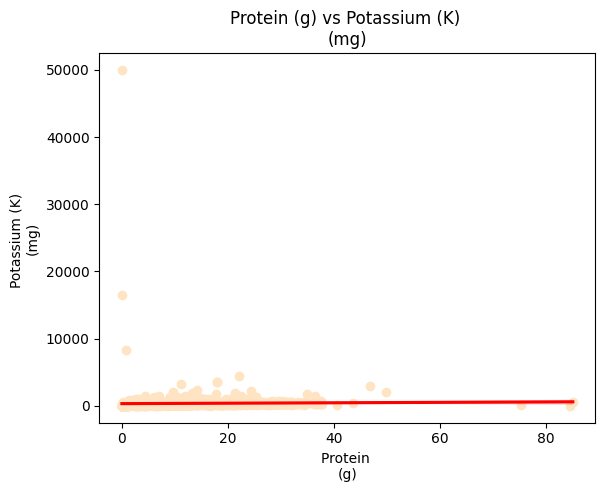

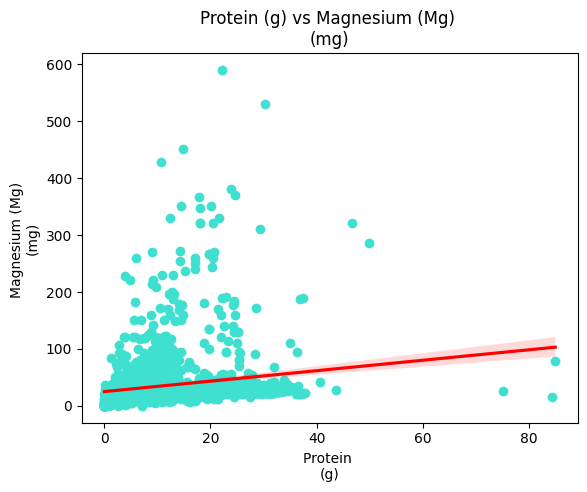

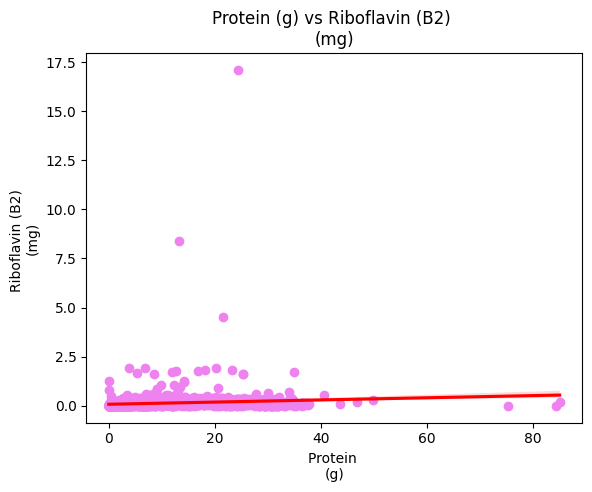

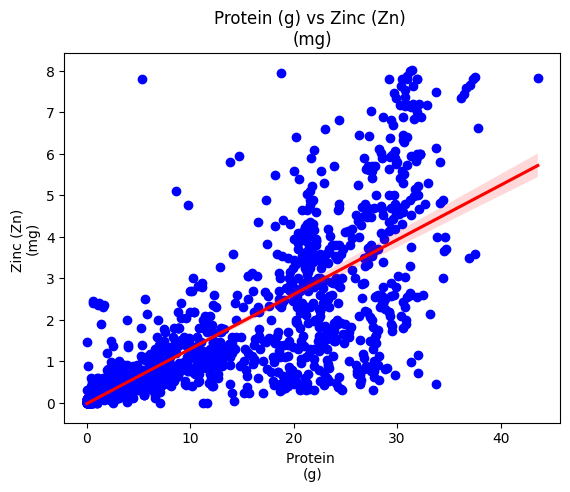

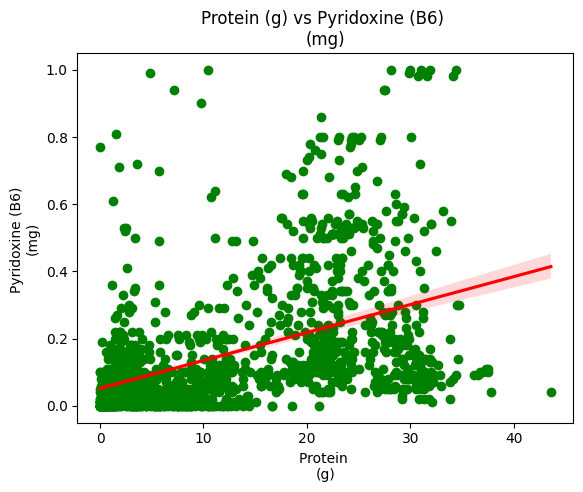

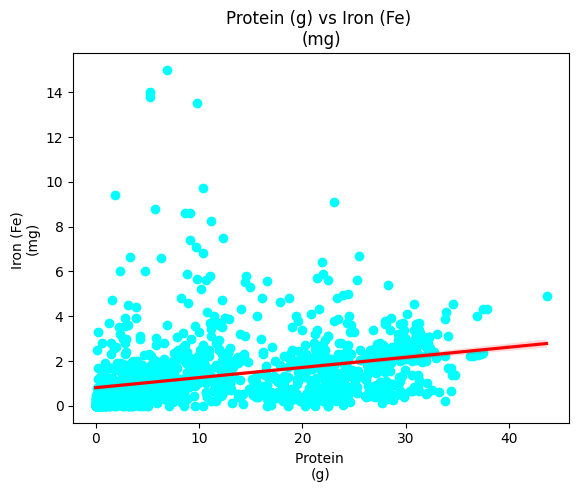

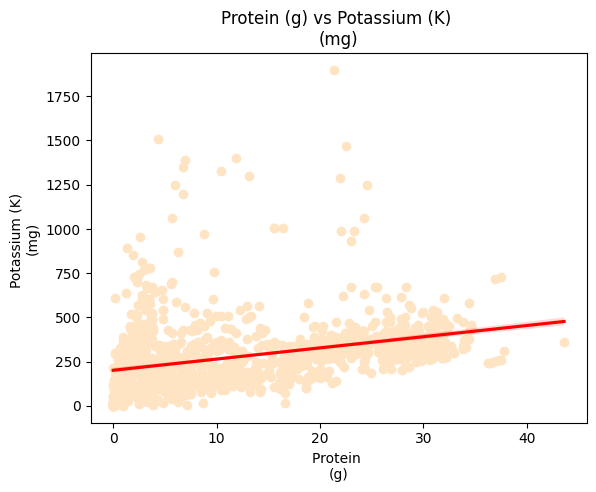

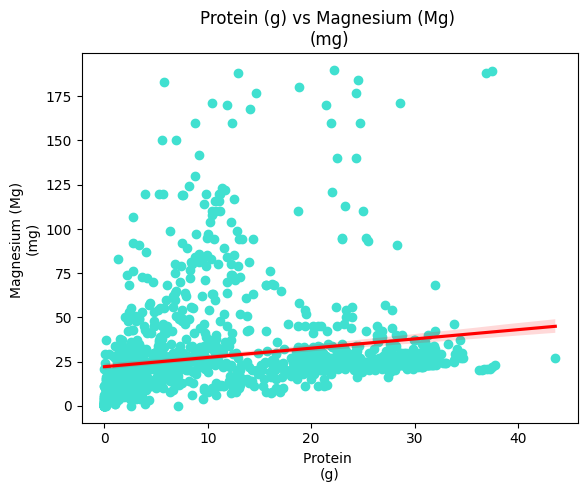

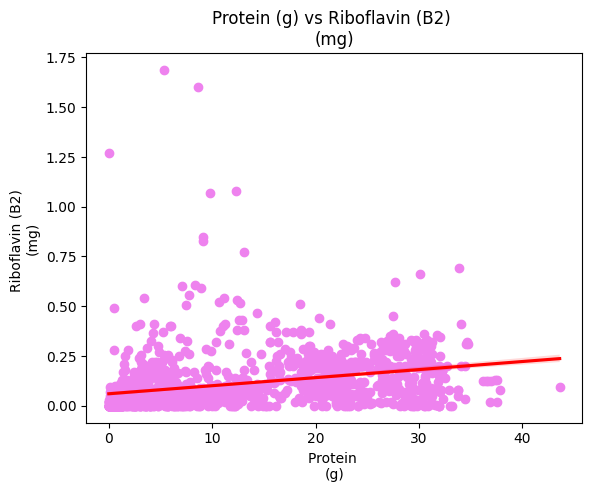

Pearson Correlation Coefficients:
Zinc (Zn) \n(mg)          0.772848
Pyridoxine (B6) \n(mg)    0.467158
Iron (Fe) \n(mg)          0.329974
Potassium (K) \n(mg)      0.359124
Magnesium (Mg) \n(mg)     0.205229
Riboflavin (B2) \n(mg)    0.323212
dtype: float64


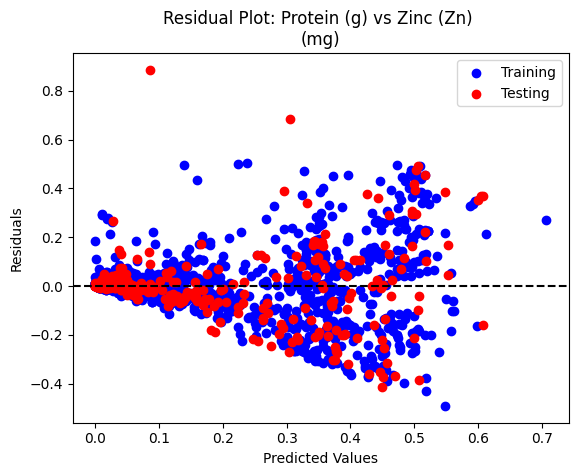

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


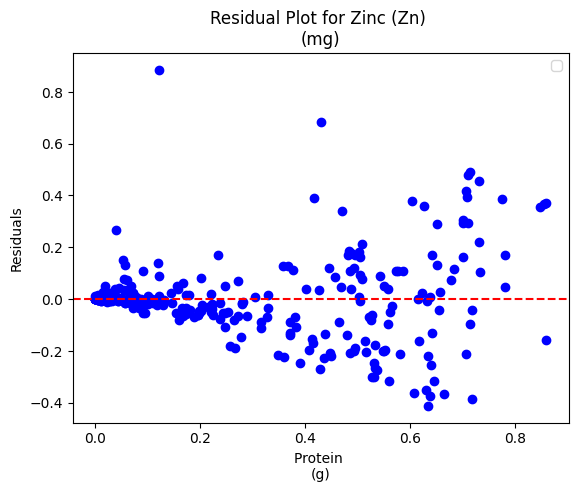

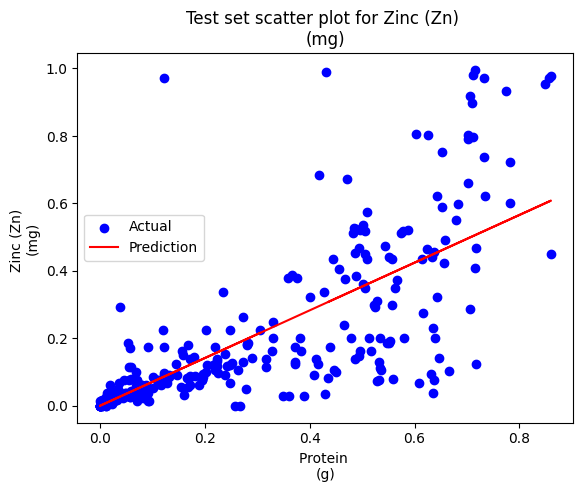

R-squared: Protein (g) for Zinc (Zn) 
(mg): 0.5733913453757151
Cross-validated R-squared: Protein (g) for Zinc (Zn) 
(mg): 0.5988136201378834
Cross-validated MSE: Protein (g) for Zinc (Zn) 
(mg): 0.020159226999026624
MSE of the linear model trained only by the feature: Protein (g): 0.025611034045729935


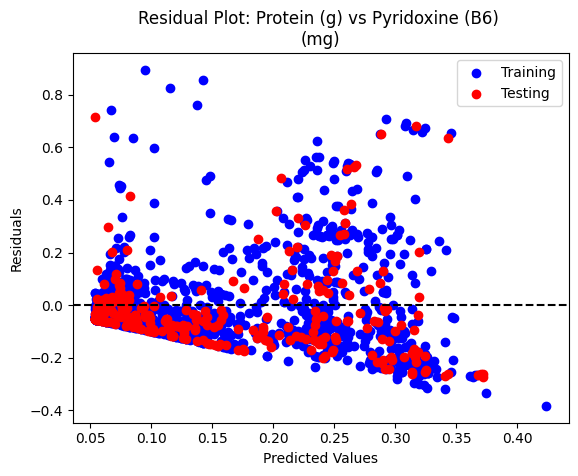

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


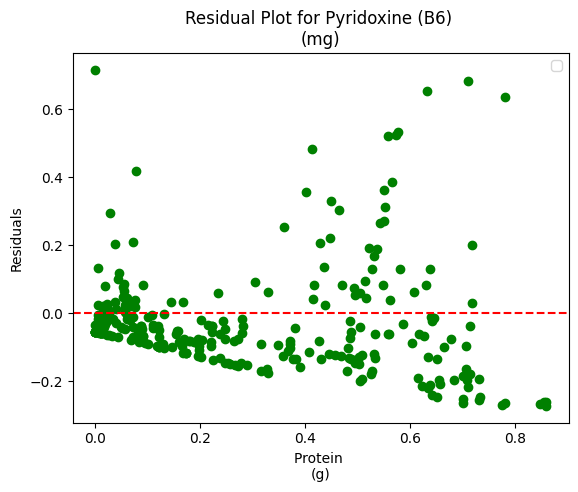

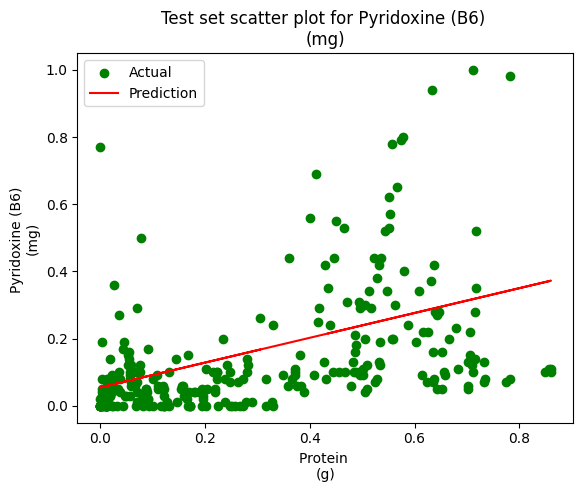

R-squared: Protein (g) for Pyridoxine (B6) 
(mg): 0.2042824082211483
Cross-validated R-squared: Protein (g) for Pyridoxine (B6) 
(mg): 0.2148362756798857
Cross-validated MSE: Protein (g) for Pyridoxine (B6) 
(mg): 0.030011223716318265
MSE of the linear model trained only by the feature: Protein (g): 0.0254378972188026


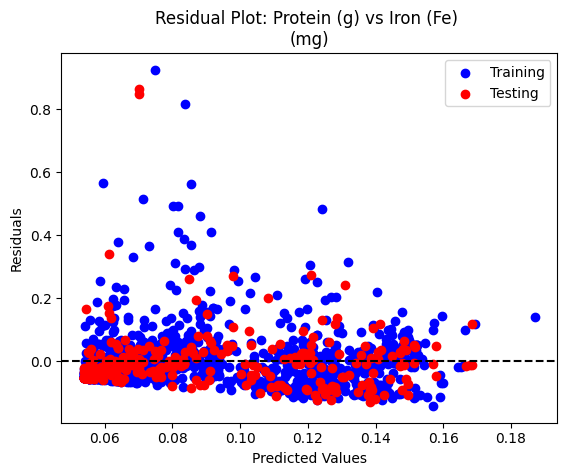

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


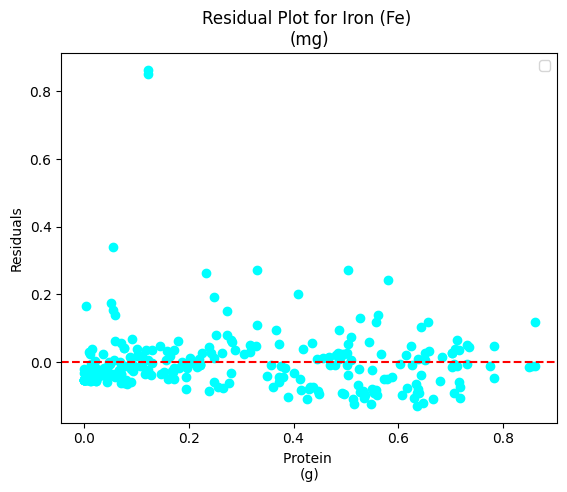

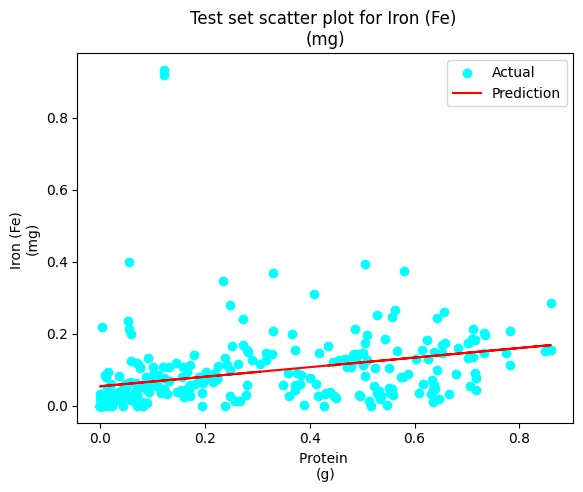

R-squared: Protein (g) for Iron (Fe) 
(mg): 0.08895376194600535
Cross-validated R-squared: Protein (g) for Iron (Fe) 
(mg): 0.1263262518119465
Cross-validated MSE: Protein (g) for Iron (Fe) 
(mg): 0.008464327157222859
MSE of the linear model trained only by the feature: Protein (g): 0.009926602969914686


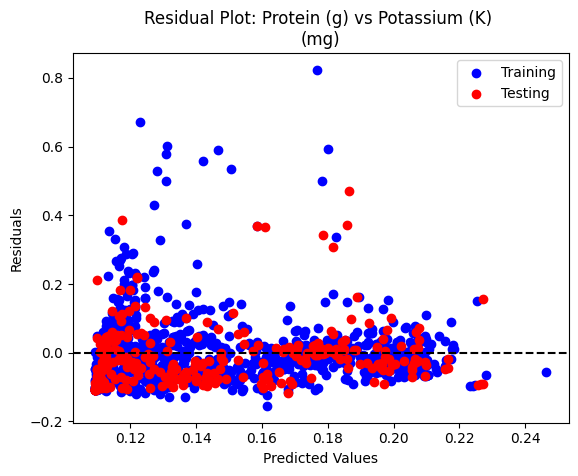

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


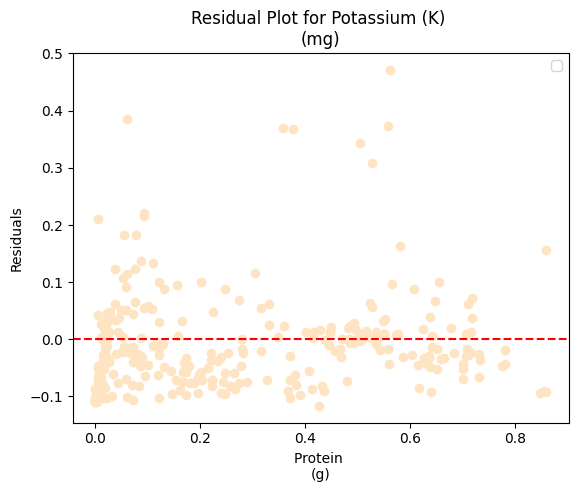

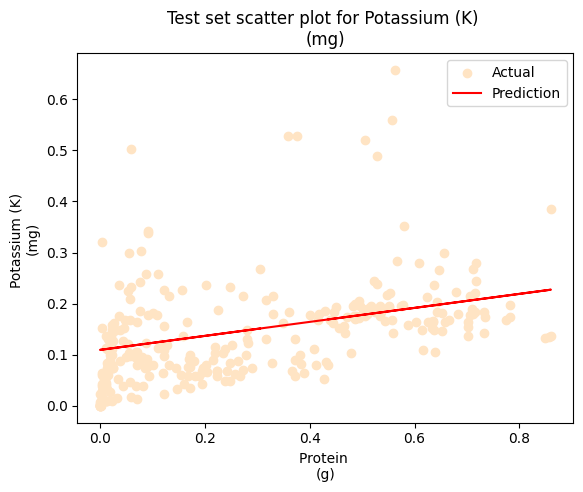

R-squared: Protein (g) for Potassium (K) 
(mg): 0.1896743647425031
Cross-validated R-squared: Protein (g) for Potassium (K) 
(mg): 0.110604957927225
Cross-validated MSE: Protein (g) for Potassium (K) 
(mg): 0.009038071053474966
MSE of the linear model trained only by the feature: Protein (g): 0.007753381548262026


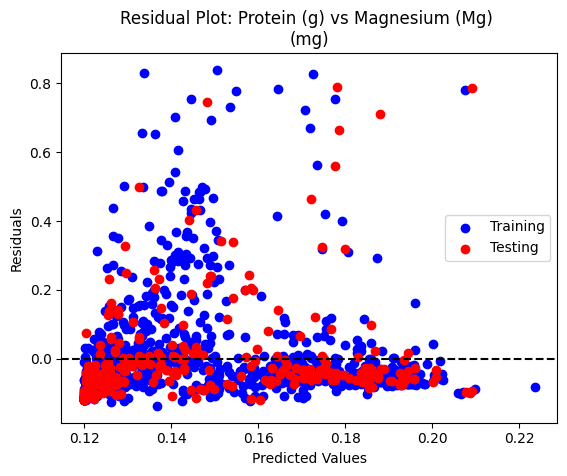

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


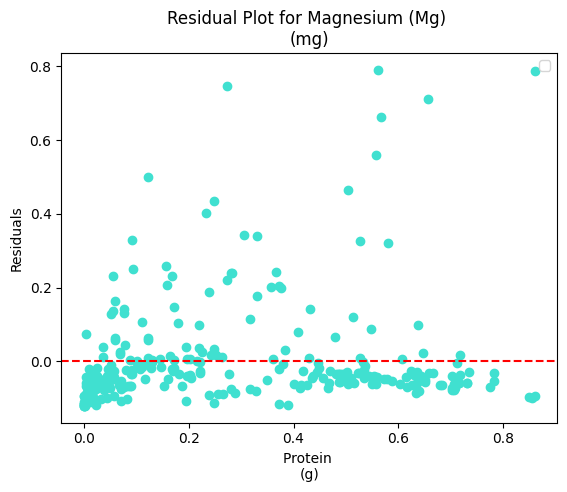

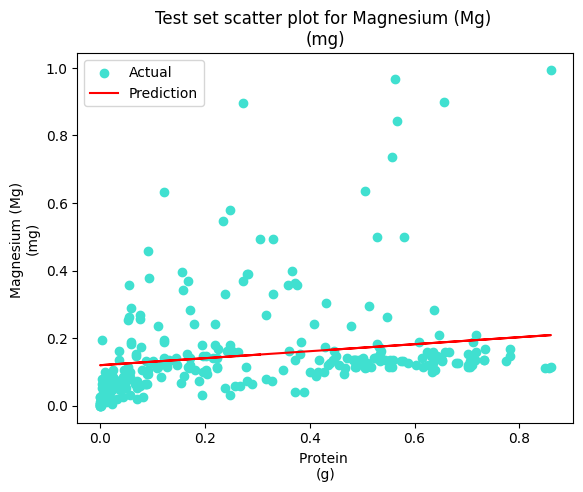

R-squared: Protein (g) for Magnesium (Mg) 
(mg): 0.07241564362704744
Cross-validated R-squared: Protein (g) for Magnesium (Mg) 
(mg): 0.02758305705264319
Cross-validated MSE: Protein (g) for Magnesium (Mg) 
(mg): 0.01990673645484341
MSE of the linear model trained only by the feature: Protein (g): 0.021752559319436187


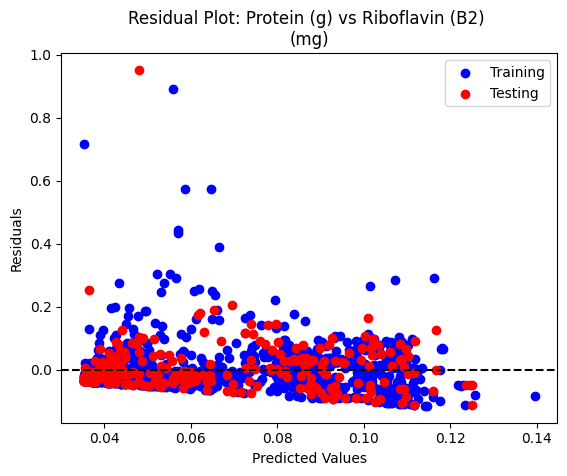

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


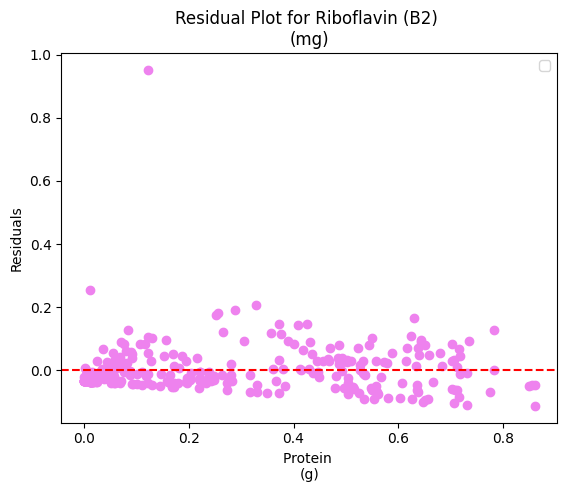

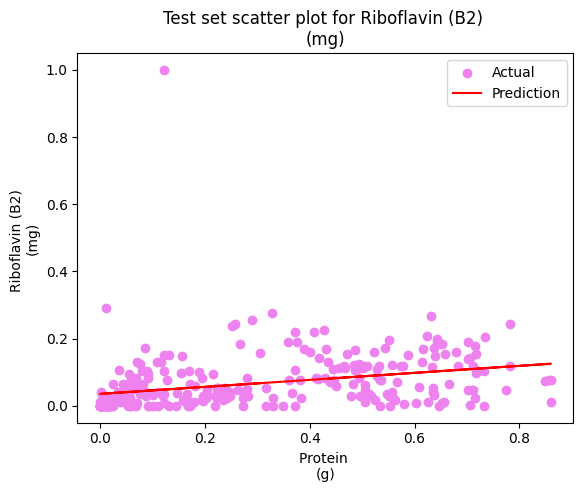

R-squared: Protein (g) for Riboflavin (B2) 
(mg): 0.09558889685557637
Cross-validated R-squared: Protein (g) for Riboflavin (B2) 
(mg): 0.11445768703711627
Cross-validated MSE: Protein (g) for Riboflavin (B2) 
(mg): 0.005598387530733856
MSE of the linear model trained only by the feature: Protein (g): 0.006556556153885621
R-squared training:0.19820307257504702
R-squared testing: 0.20405107012799925
Cross-validated R-squared:0.19877030827445005
Cross-validated MSE:0.015529662151936663


In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from scipy import stats


# Read the Excel file (aka. sp|readsheet)
file_path = 'nutrient-file-release2-jan22.xlsx'
# The table is in the sheet: 'All solids & liquids per 100g'
data = pd.read_excel(file_path, sheet_name='All solids & liquids per 100g')

# Setting the names of the nutirnts we intend to predict
data_scaled_name = ['Zinc (Zn) \n(mg)','Pyridoxine (B6) \n(mg)', 'Iron (Fe) \n(mg)', 'Potassium (K) \n(mg)', 'Magnesium (Mg) \n(mg)', 'Riboflavin (B2) \n(mg)']

# only wants data after the third column because the first three columns are not nutrients
data = data.iloc[:, 3:]

# drop the column 'Protein \n(g)' because it is the topic we want to study
# data = data.drop(columns=['Protein \n(g)'])

# calculate the missing value ratio
missing_ratios = data.isnull().sum() / len(data)

# calculate the zero value ratio
zero_ratios = (data == 0).sum() / len(data)


# score
scores = pd.Series(0, index=data.columns)


# Calculate scores for the current nutrient
for column in data.columns:
    # 1. missing value ratio
    # for missing values: ==0% + 6, <1.0% + 5.85, <2.0% + 5.55, <5% + 5.15, <10% + 4.15, <20% + 2.15, other no score bonus
    if missing_ratios[column] == 0:
        scores[column] += 6.00
    elif 0 < missing_ratios[column] < 0.01:
        scores[column] += 5.85
    elif 0.01 < missing_ratios[column] < 0.02:
        scores[column] += 5.55
    elif 0.02 < missing_ratios[column] < 0.05:
        scores[column] += 5.15
    elif 0.05 < missing_ratios[column] < 0.1:
        scores[column] += 4.15
    elif 0.1 < missing_ratios[column] < 0.2:
        scores[column] += 2.15

    # 2. zero ratio
    # for zero values: <40% + 1.6, <30% + 2.4, <20% + 3.2, <10% + 3.6, <5% + 3.84, <2% + 3.92, =0 + 4 other no score bonus
    if 0.3 <= zero_ratios[column] < 0.4:
        scores[column] += 1.60
    elif 0.2 <= zero_ratios[column] < 0.3:
        scores[column] += 2.40
    elif 0.1 <= zero_ratios[column] < 0.2:
        scores[column] += 3.20
    elif 0.05 <= zero_ratios[column] < 0.1:
        scores[column] += 3.60
    elif 0.02 <= zero_ratios[column] < 0.05:
        scores[column] += 3.84
    elif 0.0 < zero_ratios[column] < 0.02:
        scores[column] += 3.92
    elif zero_ratios[column] == 0:
        scores[column] += 4.00

# get scores
scores = scores[scores > 9].sort_values(ascending=False)
print(scores)

# select the data with these high scores
data = data[scores.index]

# Drop rows with missing values
data.dropna(inplace=True)

# Plot the graph before removing outliers
for name, color in zip(data_scaled_name, ['blue', 'green', 'cyan', 'bisque', 'turquoise', 'violet']):  
    plt.scatter(data[['Protein \n(g)']], data[[name]], color=color)
    
    # Add the line of best fit
    sns.regplot(data=data, x='Protein \n(g)', y=name, color= 'red', scatter=False)

    plt.xlabel('Protein \n(g)')
    plt.ylabel(name)
    plt.title(f'Protein (g) vs {name}')
    plt.show()

# Remove outliers using Z-Score method
z_scores = np.abs(stats.zscore(data))
threshold = 3
data = data[(z_scores < threshold).all(axis=1)]

# Plot the graph after removing outliers
for name, color in zip(data_scaled_name, ['blue', 'green', 'cyan', 'bisque', 'turquoise', 'violet']):  
    # Plot the scatter plot and the line of regression (MSE)
    plt.scatter(data[['Protein \n(g)']], data[[name]], color=color)

    # Add the line of best fit
    sns.regplot(data=data, x='Protein \n(g)', y=name, color= 'red', scatter=False)

    plt.xlabel('Protein \n(g)')
    plt.ylabel(name)
    plt.title(f'Protein (g) vs {name}')
    plt.show()

# Initialize a MinMaxScaler, because out of all kinds of stardardizations, MinMaxScaler(aka normalization) is the most suitable for this data as for example the nutrient some of it is mg, some is g, and some g is very spread out some is very concentrated
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame so that it's easier to work with and plot
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
cor = data_scaled[data_scaled_name].corr()

# Split the data into features (X) and target (y)
X = data_scaled.drop(columns=['Protein \n(g)'])
y = data_scaled['Protein \n(g)']

# Calculate the Pearson correlation coefficients
correlation_coeffs = X.corrwith(y)

# Print the correlation coefficients
print("Pearson Correlation Coefficients:")
print(correlation_coeffs[data_scaled_name])

# Only the protein data, only create a new dataframe with the protein and currewnt nutrient column
protein_data = data_scaled[['Protein \n(g)']]

# define a 5-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store the results
training_r2 = []
test_r2 = []
cv_r2 = []
cv_mse = []

# Loop through each nutrient to fit a linear regression model.
for name,color in zip(data_scaled_name,  ['blue', 'green', 'cyan', 'bisque', 'turquoise', 'violet']):
    for column in data_scaled[[name]].columns:
        # Skip 'Protein \n(g)' itself
        if column == 'Protein \n(g)':
            continue

        # the current nutrient data
        nutrient_data = data_scaled[column].dropna()

        # Combine protein and current nutrient data
        combined_data = pd.concat([protein_data, nutrient_data], axis=1)

        # Split the data into training and testing data, training size 80%, test 20%
        train_data, test_data = train_test_split(combined_data, test_size=0.2, random_state = 62)

        # Define the training data
        X_train = train_data[['Protein \n(g)']]
        y_train = train_data[column]

        # Define the testing data
        X_test = test_data[['Protein \n(g)']]
        y_test = test_data[column]

        # Fit the model to the training data
        model = LinearRegression().fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Calculate R^2 scores
        training_r2.append(model.score(X_train, y_train))
        test_r2.append(model.score(X_test, y_test))

        # Perform cross-validation and compute scores
        cv_r2_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
        cv_mse_scores = -cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

        # Append the mean scores to the respective lists
        cv_r2.append(np.mean(cv_r2_scores))
        cv_mse.append(np.mean(cv_mse_scores))

        # Calculate residuals
        residuals = y_test - predictions

        # Plot the scatter plot and the line of regression (MSE)
        plt.scatter(X_test, residuals, color= color)
        plt.axhline(y=0, color='red', linestyle='--')
        plt.xlabel('Protein \n(g)')
        plt.ylabel('Residuals')
        plt.title(f'Residual Plot for {column}')
        plt.legend()
        plt.show()

        # Plot the scatter plot and the line of regression (MSE)
        plt.scatter(X_test, y_test, color= color, label='Actual')
        plt.plot(X_test, predictions, color='red', label='Prediction')
        plt.xlabel('Protein \n(g)')
        plt.ylabel(column)
        plt.title(f'Test set scatter plot for {column}')
        plt.legend()
        plt.show()

        # Print the results
        print(f"R-squared: Protein (g) for {column}: {test_r2[-1]}")
        print(f"Cross-validated R-squared: Protein (g) for {column}: {cv_r2[-1]}")
        print(f"Cross-validated MSE: Protein (g) for {column}: {cv_mse[-1]}")
        print('MSE of the linear model trained only by the feature: Protein (g):', mean_squared_error(y_test, predictions))

    
# Print the results
print(f"R-squared training:{np.mean(training_r2)}")
print(f"R-squared testing: {np.mean(test_r2)}")
print(f"Cross-validated R-squared:{np.mean(cv_r2)}")
print(f"Cross-validated MSE:{np.mean(cv_mse)}")




